# Isolation Forest: IForest

In this notebook we explore the using of IForest for anomaly detection. For this purpose, we will use the following procedure:

1. We use the public test set for the training process. We randomly select 80% of the non-contaminated data for training, and the remaining 20% + contaminated data is used for validation.
2. The performance of the model was measured over the private test set.

We perform cross-validation to select the hyperparameter "contamination", which defines amount of contaminated data in the dataset. For the rest of the hyperparameters.
The number of trees is setted as $n_{t}=100$, as the original paper suggests.

In [1]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import IsolationForest

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from torchvision import datasets

def get_mnist(anormal_class, data_dir='./data/mnist/'):
    
    train = datasets.MNIST(root=data_dir, train=True, download=True)
    test = datasets.MNIST(root=data_dir, train=False, download=True)

    x_train = (train.data).float()/255.
    y_train = train.targets

    x_train = x_train[np.where(y_train!=anormal_class)]
    y_train = y_train[np.where(y_train!=anormal_class)]
    y2_train = np.where(y_train==anormal_class, 1, 0)
    data_train = x_train.view(x_train.size(0), -1), y_train, y2_train
    
    x_test = (test.data).float()/255.
    y_test = test.targets
    y2_test = np.where(y_test==anormal_class, 1, 0)
    data_test = x_test.view(x_test.size(0), -1), y_test, y2_test
    return data_train, data_test

In [3]:
anormal_class = 5
data_train, data_test = get_mnist(anormal_class)
x_train, _, y_train = data_train
x_test, _, y_test = data_test

N_val = int(x_test.size(0)*0.9)

In [4]:
x_val = x_test[N_val:]
y_val = y_test[N_val:]
x_test = x_test[:N_val]
y_test = y_test[:N_val]

In [7]:
contaminations = [0.001, 0.005, 0.01]

mean_roc = []
std_roc = []
for contamination in contaminations:
    rocs = []
    for rep in range(5):
        clf = IsolationForest(contamination=contamination, n_estimators=100, max_samples=256).fit(x_train)
        y_pred =  clf.score_samples(x_val)
        roc = roc_auc_score(y_val, y_pred)
        rocs.append(roc)
        print('The ROC-AUC for OC-SVM using contam={} is {}'.format(contamination, roc))
    mean_roc.append(np.mean(rocs))
    std_roc.append(np.std(rocs))

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


The ROC-AUC for OC-SVM using contam=0.001 is 0.44036001285760207


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


The ROC-AUC for OC-SVM using contam=0.001 is 0.4720668595306975


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


The ROC-AUC for OC-SVM using contam=0.001 is 0.41470909675345546


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


The ROC-AUC for OC-SVM using contam=0.001 is 0.45072324011571846


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


The ROC-AUC for OC-SVM using contam=0.001 is 0.4277209900353584


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


The ROC-AUC for OC-SVM using contam=0.005 is 0.4167534554805528


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


The ROC-AUC for OC-SVM using contam=0.005 is 0.45029893924783027


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


The ROC-AUC for OC-SVM using contam=0.005 is 0.432812600450016


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


The ROC-AUC for OC-SVM using contam=0.005 is 0.4682738669238187


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


The ROC-AUC for OC-SVM using contam=0.005 is 0.47669559627129543


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


The ROC-AUC for OC-SVM using contam=0.01 is 0.4543876567020251


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


The ROC-AUC for OC-SVM using contam=0.01 is 0.43430408228865325


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


The ROC-AUC for OC-SVM using contam=0.01 is 0.45528768884603027


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


The ROC-AUC for OC-SVM using contam=0.01 is 0.4525104468016715


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


The ROC-AUC for OC-SVM using contam=0.01 is 0.4374027643844423


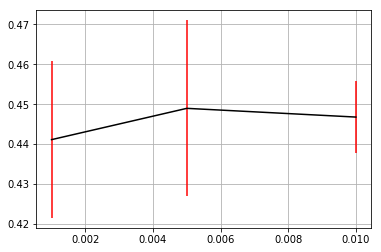

In [8]:
plt.errorbar(contaminations, mean_roc, yerr=std_roc, color='k', ecolor='r')
plt.grid()
plt.show()

## Using contamination=0.005:

In [9]:
IsolationForest(contamination=0.005, n_estimators=100, max_samples=256).fit(x_train)

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination=0.005,
        max_features=1.0, max_samples=256, n_estimators=100, n_jobs=None,
        random_state=None, verbose=0)

In [10]:
x_in = x_test[y_test==1]
x_out = x_test[y_test==0]

In [12]:
scores_in =  clf.score_samples(x_in)
scores_out =  clf.score_samples(x_out)

In [15]:
scores = clf.score_samples(x_test)
roc_auc_score(y_test, scores)

0.3850612341571847

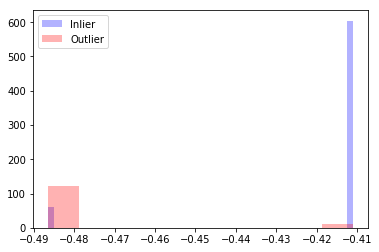

In [14]:
plt.hist(scores_in, bins=50, color='b', alpha=0.3, density=True, label='Inlier')
plt.hist(scores_out, bins=10, color='r', alpha=0.3, density=True, label='Outlier')
plt.legend()